# Objective
-  What is the monthly gross margins per product?
- Recommendation to the Management for next
steps

### Importing Required Libraries

In [1]:
# data manipulation
import os
import pandas as pd

# data visulaization
import seaborn as sns
from scripts.visualization import create_several_barplots_in_a_figure
from scripts.visualization import plot_bargraph

#generate report
from scripts.generate_analytics_report import PDF

# custom functions
from scripts.utils import read_xlsx
from scripts.utils import extract_date_features
from scripts.utils import get_commision
from scripts.utils import group_by_and_sum_rows

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Importing the data set

In [2]:
data = read_xlsx('Data Analyst - Recruiting Task - Commission Dataset.xlsx', 'data')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_date   657 non-null    datetime64[ns]
 1   product      657 non-null    object        
 2   provider     657 non-null    object        
 3   order_count  657 non-null    float64       
 4   revenue      657 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 25.8+ KB


# What is the monthly gross margins per product?

##### Feature Engineering
Extract Date Features i.e. year, month

In [4]:

data['month'] = extract_date_features(data, 
                      date_column='order_date',
                      feature_name='month')

data['week'] = extract_date_features(data, 
                      date_column='order_date',
                      feature_name='week')

data['year'] = extract_date_features(data, 
                      date_column='order_date',
                      feature_name='year')
data

,order_date,product,provider,order_count,revenue,month,week,year
0,2021-06-21,D,roadrunner,26.0,1789.90,6,25,2021
1,2021-06-21,D,micky_mouse,9.0,540.78,6,25,2021
2,2021-06-21,A,micky_mouse,7.0,567.25,6,25,2021
3,2021-06-21,A,roadrunner,8.0,666.50,6,25,2021
4,2021-06-21,D,donald_duck,7.0,435.77,6,25,2021
...,...,...,...,...,...,...,...,...
652,2021-06-08,B,tom_jerry,0.0,7.25,6,23,2021
653,2021-06-20,A,donald_duck,2.0,124.75,6,24,2021
654,2021-06-05,D,tom_jerry,0.0,3.75,6,22,2021
655,2021-06-20,D,donald_duck,1.0,49.76,6,24,2021


#### Gather Monthly data by product

Calculate monthly revenue per product

In [5]:
monthly_data_by_product = group_by_and_sum_rows(data, 
                                                  group_by_columns=['product','provider','year','month'], 
                                                  column_to_sum = 'revenue',
                                                  resulted_column_name='revenue')
monthly_data_by_product.head()

,product,provider,year,month,revenue
0,A,donald_duck,2021,5,11477.25
1,A,donald_duck,2021,6,8287.00
2,A,micky_mouse,2021,5,17991.50
3,A,micky_mouse,2021,6,13472.25
4,A,roadrunner,2021,5,24854.50


Get Total order per month by providers

In [6]:
select = 'order_count'
df_total_order_count_per_month = group_by_and_sum_rows(data, 
                                                          group_by_columns=['product','provider','year','month'], 
                                                          column_to_sum = select,
                                                          resulted_column_name=select)
df_total_order_count_per_month.head()

,product,provider,year,month,order_count
0,A,donald_duck,2021,5,146.0
1,A,donald_duck,2021,6,109.0
2,A,micky_mouse,2021,5,256.0
3,A,micky_mouse,2021,6,188.0
4,A,roadrunner,2021,5,295.0


Append Total orders in a month with monthly data 

In [7]:
monthly_data_by_product = monthly_data_by_product.merge(df_total_order_count_per_month, how="outer")
monthly_data_by_product.head()

,product,provider,year,month,revenue,order_count
0,A,donald_duck,2021,5,11477.25,146.0
1,A,donald_duck,2021,6,8287.00,109.0
2,A,micky_mouse,2021,5,17991.50,256.0
3,A,micky_mouse,2021,6,13472.25,188.0
4,A,roadrunner,2021,5,24854.50,295.0


Calculate monthly commision

In [8]:
monthly_data_by_product['commision'] = monthly_data_by_product.apply(lambda row : get_commision(row['provider'], row[select]), axis = 1)
monthly_data_by_product.head()

,product,provider,year,month,revenue,order_count,commision
0,A,donald_duck,2021,5,11477.25,146.0,7300.0
1,A,donald_duck,2021,6,8287.00,109.0,5450.0
2,A,micky_mouse,2021,5,17991.50,256.0,10000.0
3,A,micky_mouse,2021,6,13472.25,188.0,10000.0
4,A,roadrunner,2021,5,24854.50,295.0,14750.0


#### Calculate Gross Margins

In [9]:
monthly_data_by_product['gross_margin(%)'] = (monthly_data_by_product['revenue']-monthly_data_by_product['commision'])*100/monthly_data_by_product['revenue']
monthly_data_by_product.head()

,product,provider,year,month,revenue,order_count,commision,gross_margin(%)
0,A,donald_duck,2021,5,11477.25,146.0,7300.0,36.395914
1,A,donald_duck,2021,6,8287.00,109.0,5450.0,34.234343
2,A,micky_mouse,2021,5,17991.50,256.0,10000.0,44.418197
3,A,micky_mouse,2021,6,13472.25,188.0,10000.0,25.773349
4,A,roadrunner,2021,5,24854.50,295.0,14750.0,40.654610


Plot Monthly gross margin

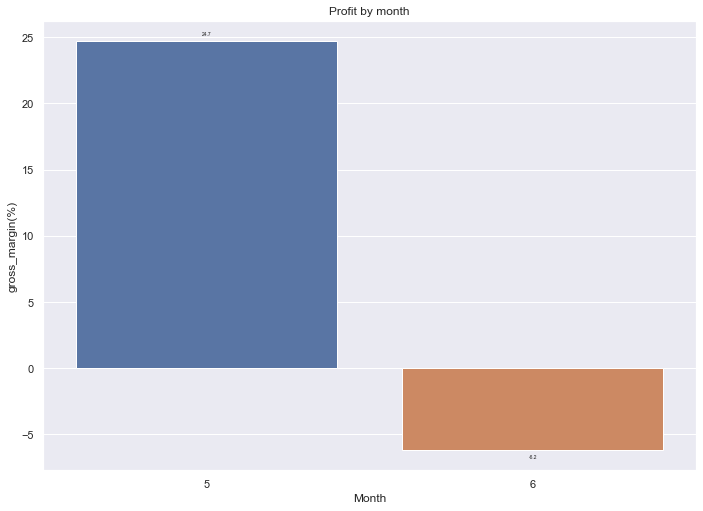

In [10]:
plot_bargraph(monthly_data_by_product,
                  x_axis_column='month',
                  y_axis_column='gross_margin(%)',
                  x_label_name= 'Month',
                  y_label_name='gross_margin(%)',
                  title='Profit by month',
                  save_path = None)

Monthly Gross Margin by Product and Provider

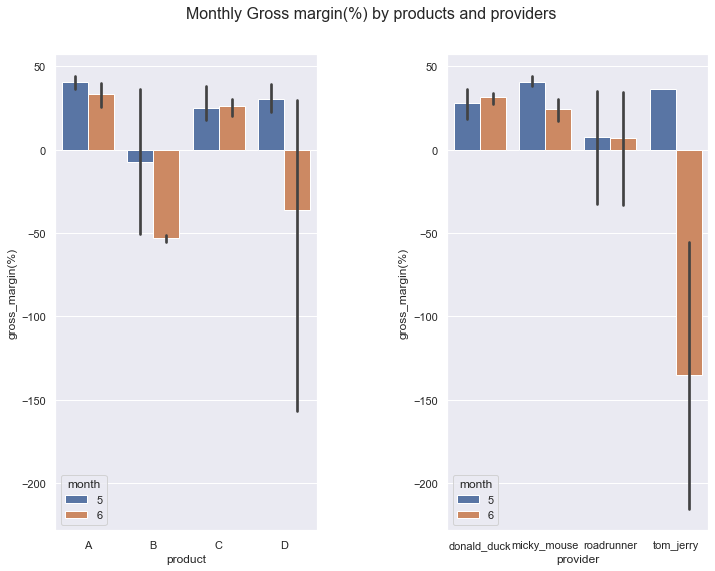

In [11]:
create_several_barplots_in_a_figure(monthly_data_by_product,
                                    ['product', 'provider',],
                                    ['gross_margin(%)','gross_margin(%)',],
                                    ['month', 'month',],
                                    figure_title ='Monthly Gross margin(%) by products and providers',
                                    num_subplots=2,

                                    )

# Recommendation to the Management for next steps
   - Identify the contributors towards negative profit
       - Product B,D along with provider tom_jerry seems to be the main contributor towards negative profit margin

#### Investigating Product B

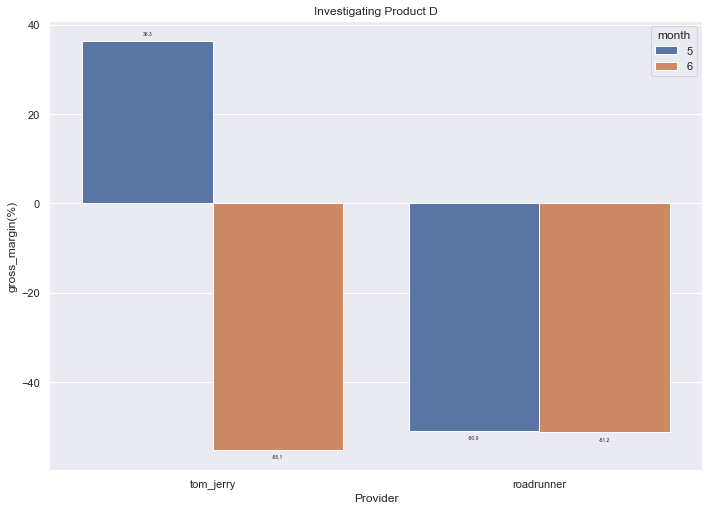

In [12]:
plot_bargraph(monthly_data_by_product[monthly_data_by_product['product']=='B'],
                  x_axis_column='provider',
                  y_axis_column='gross_margin(%)',
                  hue_column_name='month',
                  x_label_name= 'Provider',
                  y_label_name='gross_margin(%)',
                  title='Investigating Product D',
                  save_path = None)

Remarks: 
   - Stop purchasing product 'B' from roadrunner
   - investigate product quality from tom_jerry
   - stop offering if no possible solution found (i.e. possible cause of failure and no other providers offering the product)

#### Investigating Product D

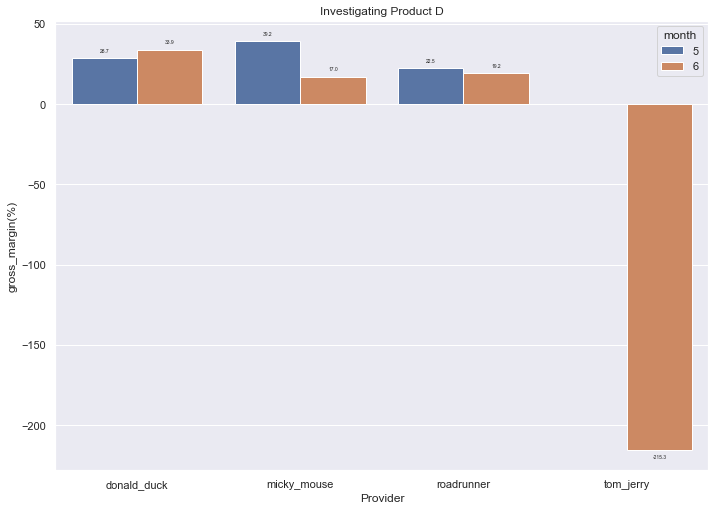

In [13]:
plot_bargraph(monthly_data_by_product[monthly_data_by_product['product']=='D'],
                  x_axis_column='provider',
                  y_axis_column='gross_margin(%)',
                  hue_column_name='month',
                  x_label_name= 'Provider',
                  y_label_name='gross_margin(%)',
                  title='Investigating Product D',
                  save_path = None)


   - Stop purchasing product 'D' from tom_jerry